In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
%%html
<style>
table {float:left;}
</style>

In [4]:
import sys
sys.path.append("./tools")

In [5]:
from quantum import *
from measurements import *

from unitary import *
from VQC import *

from dataSL import *
from QOLearner import *

from noise import *
from lipschitz import *

In [6]:
MAX_TIMES = 10

In [7]:
def getLosses(name, strategy):
    losses = []
    max_length = 0
    for i in range(MAX_TIMES):
        losses.append(loadLosses(name, strategy, i + 1))
        max_length = max(max_length, len(losses[-1]))

    for i in range(MAX_TIMES):
        length = len(losses[i])
        while length < max_length:
            losses[i].append(losses[i][-1])
            length += 1
            
    return losses

## Load Losses

In [8]:
losses_unitary_sdc = getLosses('sdc2', 'unitary')
losses_vqc_sdc = getLosses('sdc2', 'vqc')

In [9]:
losses_unitary_sqt = getLosses('sqt', 'unitary')
losses_vqc_sqt = getLosses('sqt', 'vqc')

In [10]:
losses_unitary_grover = getLosses('grover', 'unitary')
losses_vqc_grover = getLosses('grover', 'vqc')

## Plot losses

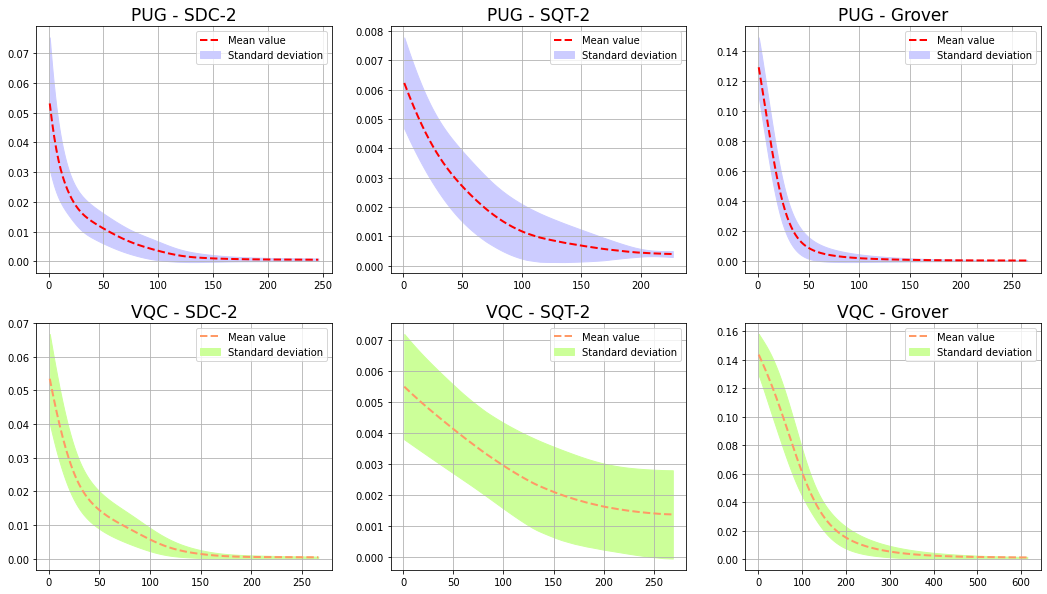

In [11]:
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
plotLosses(losses_unitary_sdc, title="PUG - SDC-2", fontsize=17)
plt.subplot(2,3,2)
plotLosses(losses_unitary_sqt, title="PUG - SQT-2", fontsize=17)
plt.subplot(2,3,3)
plotLosses(losses_unitary_grover, title="PUG - Grover", fontsize=17)

plt.subplot(2,3,4)
plotLosses(losses_vqc_sdc, color="#FF9966", fill_color="#CCFF99", title="VQC - SDC-2", fontsize=17)
plt.subplot(2,3,5)
plotLosses(losses_vqc_sqt, color="#FF9966", fill_color="#CCFF99", title="VQC - SQT-2", fontsize=17)
plt.subplot(2,3,6)
plotLosses(losses_vqc_grover, color="#FF9966", fill_color="#CCFF99", title="VQC - Grover", fontsize=17)

## Experiments result table

<table>
    <tr >
        <th style="text-align: center" rowspan="2">Indicators</th><th rowspan="2" style="text-align: center">Strategy</th><th style="text-align: center" colspan="3">Quantum contexts</th>
    </tr>
    <tr><td style="text-align: center">SDC-2</td><td style="text-align: center">SQT-2</td><td style="text-align: center">Grover</td></tr>
    <tr><td rowspan="2"style="text-align: center">Average loss</td><td style="text-align: center">PUG</td>
        <td style="text-align: center">5.889e-4</td><td style="text-align: center">3.801e-4</td><td style="text-align: center">6.146e-4</td></tr>
    <tr><td style="text-align: center">VQC</td>
        <td style="text-align: center">3.660e-4</td><td style="text-align: center">1.558e-3</td><td style="text-align: center">1.448e-3</td></tr>
    <tr><td rowspan="2" style="text-align: center">Average time(s)</td><td style="text-align: center">PUG</td>
        <td style="text-align: center">208.4</td><td style="text-align: center">4.64</td><td style="text-align: center">96.85</td></tr>
    <tr><td style="text-align: center">VQC</td>
        <td style="text-align: center">197.5</td><td style="text-align: center">5.01</td><td style="text-align: center">92.10</td></tr>
    <tr><td rowspan="2" style="text-align: center">Average epochs</td><td style="text-align: center">PUG</td>
        <td style="text-align: center">155.8</td><td style="text-align: center">74.0</td><td style="text-align: center">145.6</td></tr>
    <tr><td style="text-align: center">VQC</td>
        <td style="text-align: center">181.6</td><td style="text-align: center">93.8</td><td style="text-align: center">448.9</td></tr>
    <tr><td rowspan="2" style="text-align: center">Average time per epoch(s)</td><td style="text-align: center">PUG</td>
        <td style="text-align: center">0.134</td><td style="text-align: center">6.27e-3</td><td style="text-align: center">0.067</td></tr>
    <tr><td style="text-align: center">VQC</td>
        <td style="text-align: center">0.109</td><td style="text-align: center">5.34e-3</td><td style="text-align: center">0.021</td></tr>
    <tr><td rowspan="2" style="text-align: center">Total parameters</td><td style="text-align: center">PUG</td>
        <td style="text-align: center">16</td><td style="text-align: center">16</td><td style="text-align: center">64</td></tr>
    <tr><td style="text-align: center">VQC</td>
        <td style="text-align: center">12</td><td style="text-align: center">12</td><td style="text-align: center">18</td></tr>
</table>

## SDC 2 VS SDC 3

In [13]:
losses_unitary_sdc3 = getLosses('sdc3', 'unitary')
losses_vqc_sdc3 = getLosses('sdc3', 'vqc')

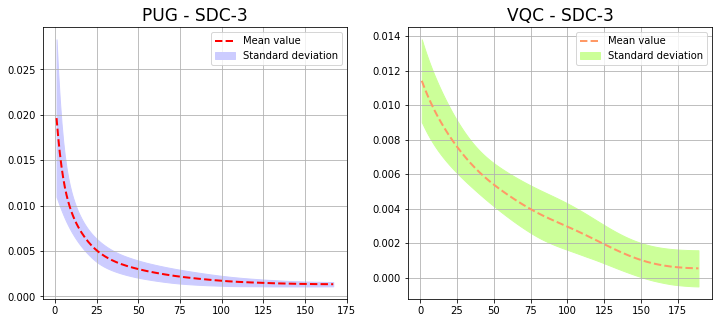

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plotLosses(losses_unitary_sdc3, title="PUG - SDC-3", fontsize=17)
plt.subplot(1,2,2)
plotLosses(losses_vqc_sdc3, color="#FF9966", fill_color="#CCFF99", title="VQC - SDC-3", fontsize=17)

In [15]:
losses_unitary_toy = getLosses('toy', 'unitary')
losses_vqc_toy = getLosses('toy', 'vqc')

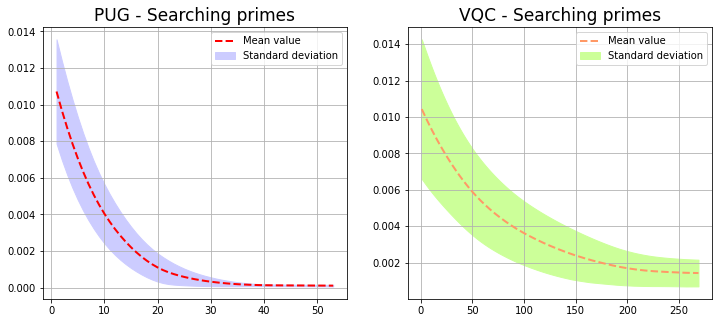

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plotLosses(losses_unitary_toy, title="PUG - Searching primes", fontsize=17)
plt.subplot(1,2,2) 
plotLosses(losses_vqc_toy, color="#FF9966", fill_color="#CCFF99", title="VQC - Searching primes", fontsize=17)

|Indicators| PU | PU+Regularization(λ=0.1) |
|:----------------:|:-----:|:-----:|
| Average loss | 5.889e-4 | 7.0255e-4 |
| Average time | 208.4 | 371.5 |
| Average epochs | 155.8 | 151.1 |
| Average time per epoch | 0.134 | 0.246 |
| Average robustness score | 2.654e-2 | 1.754e-4 |